In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/snkn1959/data_source/main/customer_pca.csv')

In [5]:
data

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,1
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.965514,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038,3
96,-0.839991,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166,0
97,-1.107688,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335,0
98,-0.940815,-0.807895,-1.093267,-1.342878,-0.676572,-1.287731,-1.305887,-1.463747,-1.050452,-0.895722,-0.708094,0.954537,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amt                      100 non-null    float64
 1   category_entertainment   100 non-null    float64
 2   category_food_dining     100 non-null    float64
 3   category_gas_transport   100 non-null    float64
 4   category_grocery         100 non-null    float64
 5   category_health_fitness  100 non-null    float64
 6   category_home            100 non-null    float64
 7   category_kids_pets       100 non-null    float64
 8   category_misc            100 non-null    float64
 9   category_personal_care   100 non-null    float64
 10  category_shopping        100 non-null    float64
 11  category_travel          100 non-null    float64
 12  label                    100 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [6]:
data['label'].value_counts()

label
0    44
3    38
2    10
1     8
Name: count, dtype: int64

In [7]:
X = data.drop('label', axis = 1)
y = data['label']

### PCA를 이용해 11개의 변수를 2개로 축소

In [8]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2) # 몇개로 줄여봐 (2개로 줄여봐) - 어떤애들이 합쳐진지는 모름
X_pca = pca.fit_transform(X)

In [10]:
X.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796


In [33]:
X_pca = pd.DataFrame(X_pca, columns=['comp1', 'comp2'])
X_pca

,comp1,comp2
0,-3.929061,0.102604
1,3.107583,-1.748879
2,3.023793,3.212212
3,-4.282418,0.011378
4,2.590658,-1.906121
...,...,...
95,3.057868,-2.070061
96,-1.980872,-0.185124
97,-3.465385,1.022298
98,-3.277164,1.392480


In [34]:
y

0     0
1     3
2     1
3     0
4     3
     ..
95    3
96    0
97    0
98    0
99    3
Name: label, Length: 100, dtype: int64

In [35]:
customer_pca = pd.concat([X_pca, y], axis=1)
customer_pca

,comp1,comp2,label
0,-3.929061,0.102604,0
1,3.107583,-1.748879,3
2,3.023793,3.212212,1
3,-4.282418,0.011378,0
4,2.590658,-1.906121,3
...,...,...,...
95,3.057868,-2.070061,3
96,-1.980872,-0.185124,0
97,-3.465385,1.022298,0
98,-3.277164,1.392480,0


<Axes: xlabel='comp1', ylabel='comp2'>

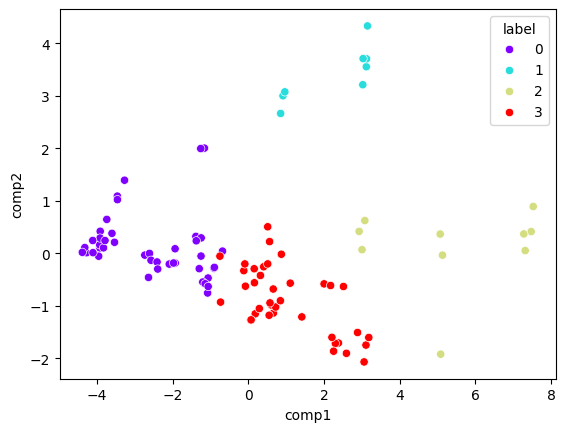

In [37]:
sns.scatterplot(x='comp1', y='comp2', data=customer_pca, hue='label', palette='rainbow')

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=8, stratify=y)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size = 0.2, stratify=y ,random_state=8)

In [40]:
X_train.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
53,-0.494192,-0.237427,-0.700457,0.011337,-0.589508,0.029752,-0.264376,-0.368092,0.069967,-0.900354,-0.615610,-0.338908
36,0.139628,0.109443,-0.326516,0.791088,0.119481,0.526045,0.149992,0.172561,0.387045,0.674467,-0.219525,-0.411515
42,-0.222681,-0.438113,1.247289,0.018106,-0.318252,-1.076545,0.005071,1.492079,0.008437,-0.260401,-0.428490,-0.551416
84,-0.465932,-0.357529,-0.724761,-0.049556,-0.590255,0.278438,-0.068808,-0.415780,-0.205475,-0.979921,-0.392479,-0.290419
41,-0.311196,-0.465611,-0.487137,0.207409,-0.209799,-0.109968,-0.480239,-0.132214,-0.517215,0.161131,-0.447118,0.046111


비율을 맞춰서 해줌 stratify=y

In [41]:
dtc1 = DecisionTreeClassifier(max_depth =3, random_state=8)
dtc1.fit(X_train, y_train)
pred1 = dtc1.predict(X_test)
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.50      1.00      0.67         1
           2       0.67      1.00      0.80         2
           3       1.00      0.62      0.77         8

    accuracy                           0.85        20
   macro avg       0.77      0.91      0.80        20
weighted avg       0.90      0.85      0.85        20



In [42]:
dtc2 = DecisionTreeClassifier(max_depth =3, random_state=8)
dtc2.fit(X_train_pca, y_train_pca)
pred2 = dtc2.predict(X_test_pca)
print(classification_report(y_test_pca, pred1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.50      1.00      0.67         1
           2       0.67      1.00      0.80         2
           3       1.00      0.62      0.77         8

    accuracy                           0.85        20
   macro avg       0.77      0.91      0.80        20
weighted avg       0.90      0.85      0.85        20



In [43]:
result = pd.DataFrame(dtc1.feature_importances_, index=dtc1.feature_names_in_)
result.sort_values(by=0, ascending=False)

,0
amt,0.558299
category_gas_transport,0.270931
category_kids_pets,0.132273
category_misc,0.038498
category_entertainment,0.000000
category_food_dining,0.000000
category_grocery,0.000000
category_health_fitness,0.000000
category_home,0.000000
category_personal_care,0.000000


# 4297개 컬럼 데이터를 PCA로 축소해 분석하기

In [44]:
data = pd.read_csv('https://media.githubusercontent.com/media/musthave-ML10/data_source/main/anonymous.csv')

In [45]:
data.head()

,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296
0,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.25777,0.12220,0.348620,0.12957,0.43846,-0.108020,0.128330,0.318820,-0.041559,0.22589
1,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15316,0.14062,-0.030201,0.10134,-0.14546,-0.166650,0.401300,0.035392,0.019906,0.31952
2,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.40122,0.13790,0.138350,0.15746,0.51216,-0.330690,0.070346,0.179250,-0.188740,0.16386
3,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15587,-0.26686,0.158930,-0.13204,0.32221,-0.042086,0.588970,0.526990,-0.574320,0.20891
4,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,0.24020,0.44605,-0.163560,0.45311,0.59073,0.356800,0.395780,0.035871,-0.293430,0.38124


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 4297 entries, class to V4296
dtypes: float64(4283), int64(14)
memory usage: 655.7 MB


In [48]:
(data.isna().sum() != 0).sum()

0

In [49]:
data['class'].value_counts()

class
0    15000
1     5000
Name: count, dtype: int64

In [50]:
X = data.drop('class', axis=1)
y = data['class']

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296
0,-0.603748,-0.611584,-0.090498,-0.39686,-0.594624,-0.432352,-0.351344,-0.032746,0.397594,-0.512121,...,0.171945,0.332169,1.290402,0.499449,1.169433,-0.975917,0.414786,0.898416,0.744553,0.084744
1,-0.603748,-0.611584,-0.090498,-0.39686,-0.594624,-0.432352,-0.351344,-0.032746,0.397594,-0.512121,...,0.748805,0.428825,-0.820779,0.334597,-2.395861,-1.291476,1.944271,-0.609807,1.092683,0.594011
2,-0.603748,-0.611584,-0.090498,-0.39686,-0.594624,-0.432352,-0.351344,-0.032746,0.397594,-0.512121,...,-0.619092,0.414552,0.118561,0.662315,1.619429,-2.174376,0.089894,0.155714,-0.089064,-0.252646
3,-0.603748,-0.611584,-0.090498,-0.39686,-0.594624,-0.432352,-0.351344,-0.032746,0.397594,-0.512121,...,0.733861,-1.709363,0.233254,-1.028246,0.459634,-0.621045,2.995809,2.006164,-2.272945,-0.007612
4,-0.603748,-0.611584,-0.090498,-0.39686,-0.594624,-0.432352,-0.351344,-0.032746,0.397594,-0.512121,...,2.917941,2.031521,-1.563993,2.388789,2.099161,1.525847,1.913341,-0.607258,-0.682016,0.929715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.600179,-0.342705,-0.595098,-0.39686,0.137650,-0.432352,0.224434,0.768955,-0.507695,-0.397147,...,1.087139,-0.477255,0.628382,-0.769646,0.183225,-2.128681,-0.602641,-1.633488,0.733321,-0.460476
19996,-0.603748,1.596381,1.021972,-0.39686,-0.594624,-0.432352,-0.081903,-0.530124,-0.507695,-0.512121,...,-0.442081,-2.326870,-0.379802,1.982938,0.164725,-0.579339,-1.783600,-0.710806,2.792948,0.265106
19997,-0.603748,1.339291,0.250288,-0.39686,0.268311,-0.432352,-0.191328,-0.591302,-0.507695,-0.512121,...,-0.597972,1.358077,-1.852230,1.082940,-0.343399,0.459575,0.737133,0.310299,1.446200,-0.756202
19998,-0.400553,-0.569838,0.758906,-0.39686,0.804366,2.136898,0.258657,-0.161961,-0.507695,-0.512121,...,-0.440482,-1.735075,-0.691034,-1.630541,0.616065,2.480760,1.995371,0.121923,-0.180422,-0.211526


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=10)

In [54]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=8)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      6011
           1       0.73      0.40      0.52      1989

    accuracy                           0.81      8000
   macro avg       0.78      0.68      0.70      8000
weighted avg       0.80      0.81      0.79      8000



In [55]:
result = pd.DataFrame(dtc.feature_importances_, index=dtc.feature_names_in_)
result.sort_values(by=0, ascending=False)

,0
V4232,0.169200
V4226,0.135523
V4230,0.109911
V4184,0.090788
V4252,0.074895
...,...
V1440,0.000000
V1441,0.000000
V1442,0.000000
V1443,0.000000


In [59]:
result [result[0] > 0]

,0
V35,0.009752
V491,0.009080
V759,0.008652
V3278,0.001297
V3620,0.001308
V4115,0.005266
V4132,0.013003
V4134,0.034306
V4140,0.052667
V4153,0.013917


In [60]:
len(result [result[0] > 0])

27

In [61]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-13.06284521,   1.18400604,   0.87571617, ...,  -3.01678618,
         -2.05124594,  -4.85886743],
       [-13.30404175,   0.93911421,   0.73092852, ...,  -2.91603473,
         -2.06507446,  -4.91439163],
       [-12.93664444,   0.89201624,   0.99172265, ...,  -2.9175805 ,
         -2.30055201,  -4.86291857],
       ...,
       [-25.49893288,   5.65955951,   4.31647086, ...,  -5.07165291,
         18.10643121,   1.48669797],
       [ 11.62672464,  16.89924202,   3.69863735, ...,  -0.72096607,
         -1.75716245,   0.73511611],
       [-27.83485179,   2.56658241,   2.34573542, ..., -16.74970306,
         25.31343449,  -3.54746199]])

In [64]:
X_pca = pd.DataFrame(X_pca)

In [65]:
X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-13.062845,1.184006,0.875716,-5.134669,0.285335,7.815108,10.606988,7.305369,-13.388116,13.894700,-4.147388,12.848612,-6.009819,-1.865029,-1.206799,2.400307,-0.520741,-3.016786,-2.051246,-4.858867
1,-13.304042,0.939114,0.730929,-5.192441,0.434745,7.548351,10.612217,7.306304,-13.432325,13.770368,-4.376948,13.056010,-6.197069,-1.732343,-1.210554,2.448384,-0.662976,-2.916035,-2.065074,-4.914392
2,-12.936644,0.892016,0.991723,-5.269608,0.348903,7.684658,10.583539,7.367847,-13.474045,13.995172,-4.149048,12.904865,-6.043421,-1.869938,-1.368760,2.439714,-0.605591,-2.917581,-2.300552,-4.862919
3,-13.366896,0.911945,0.470861,-4.999320,0.371183,7.710062,10.559709,7.248881,-13.724422,13.877323,-4.430195,12.998138,-6.251210,-1.716531,-1.274583,2.300072,-0.685038,-3.015605,-1.989724,-5.012928
4,-13.376075,1.020593,1.070464,-5.192580,0.636015,8.043018,10.540683,7.357162,-13.412872,13.714325,-4.444724,13.136371,-6.191705,-2.023752,-1.346335,2.362119,-0.653120,-2.969862,-2.221065,-4.827830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,23.692448,43.744012,4.008930,6.891495,-16.407986,-7.873675,9.228686,-5.296215,11.279437,-5.948928,1.714283,-16.429079,-14.993110,-11.622531,-8.097396,0.886079,-6.872048,-7.372176,-7.782158,-4.886917
19996,30.164864,44.587703,8.161991,5.629765,-16.351893,-12.579642,14.633598,-4.599897,3.552904,-2.888420,7.723662,-14.121110,-15.373995,-1.613332,-16.831811,-3.344033,2.977435,0.785727,-1.527320,-3.099539
19997,-25.498933,5.659560,4.316471,-26.088833,2.075095,-7.043630,-0.385362,-16.901559,-7.905203,-3.214411,3.428551,-10.491213,1.160459,8.533359,1.646489,-4.899013,4.392617,-5.071653,18.106431,1.486698
19998,11.626725,16.899242,3.698637,-0.002512,2.532945,-13.100334,3.722384,6.635753,4.800841,0.006103,5.697763,-3.396691,-1.715217,-5.112834,-5.985090,2.068591,2.109738,-0.720966,-1.757162,0.735116


In [66]:
print(pca.explained_variance_)

[213.96963517 141.71255526 124.56447901 110.38529286  95.79539214
  82.86964588  72.87238225  68.95994132  63.40868082  58.32535364
  55.9432315   53.61367479  49.45280761  47.71318827  46.27394856
  44.31671691  42.53766154  39.13858659  38.06692483  36.22338233]


In [68]:
print(pca.explained_variance_ratio_)

[0.04995539 0.03308556 0.02908201 0.0257716  0.02236531 0.01934754
 0.01701348 0.01610005 0.01480399 0.01361719 0.01306104 0.01251716
 0.01154572 0.01113958 0.01080356 0.0103466  0.00993125 0.00913767
 0.00888747 0.00845706]


In [76]:
print(pca.explained_variance_ratio_.sum())

0.346969221129846


In [70]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.4, random_state=10)

In [71]:
dtc2 = DecisionTreeClassifier(max_depth=5, random_state=8)
dtc2.fit(X_train_pca, y_train_pca)
pred2 = dtc2.predict(X_test_pca)
print(classification_report(y_test_pca, pred2))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      6011
           1       0.65      0.22      0.33      1989

    accuracy                           0.78      8000
   macro avg       0.72      0.59      0.60      8000
weighted avg       0.75      0.78      0.73      8000



In [73]:
result2 = pd.DataFrame(dtc2.feature_importances_)
result2.sort_values(by=0, ascending=False)

,0
7,0.178177
4,0.165178
8,0.125461
19,0.098065
2,0.082398
10,0.073364
5,0.072397
18,0.066288
14,0.059057
17,0.038689


In [74]:
result2[result2[0] > 0]

,0
2,0.082398
4,0.165178
5,0.072397
7,0.178177
8,0.125461
9,0.025602
10,0.073364
12,0.015324
14,0.059057
17,0.038689


In [75]:
len(result2[result2[0] > 0])

12

In [84]:
pca = PCA(10)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)

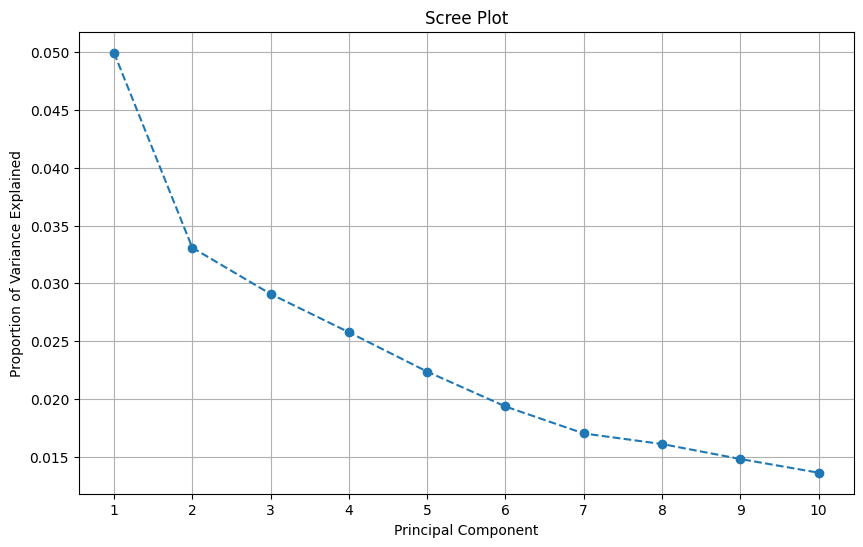

Optimal number of components: 1


In [85]:
# 주성분의 분산 비율
explained_variance_ratio = pca.explained_variance_ratio_

# Scree plot 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.show()

# 누적 분산 비율 계산
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 최적의 주성분 개수 찾기 (예: 95% 이상의 분산을 설명하는 주성분 개수)
optimal_components = np.argmax(cumulative_variance_ratio >= 0.80) + 1
print(f'Optimal number of components: {optimal_components}')


In [86]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.4, random_state=10)

In [87]:
dtc2 = DecisionTreeClassifier(max_depth=5, random_state=8)
dtc2.fit(X_train_pca, y_train_pca)
pred2 = dtc2.predict(X_test_pca)
print(classification_report(y_test_pca, pred2))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      6011
           1       0.66      0.16      0.26      1989

    accuracy                           0.77      8000
   macro avg       0.72      0.57      0.56      8000
weighted avg       0.75      0.77      0.71      8000

